In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [3]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


In [4]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 21

In [5]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_data)
reframed = series_to_supervised(scaled, lag_hours, predict_hours)

In [6]:
# Turn off shuffle, because it's a sequense model!!!
train, test = train_test_split(reframed.values, train_size=0.8, test_size=0.2, shuffle=False)
train_X = train[:, :n_features*lag_hours]

# select the pm25 data we want to predict
pm25_select = []
for i in range(predict_hours , 0, -1):
    pm25_select.append(-n_features * i)
    
train_y = train[:, pm25_select]
test_X = test[:, :n_features*lag_hours]
test_y = test[:, pm25_select]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4382, 168) (4382, 3) (1096, 168) (1096, 3)


In [12]:
train_X = train_X.reshape(train_X.shape[0], lag_hours, 21)
test_X = test_X.reshape(test_X.shape[0], lag_hours, 21)

# LSTM using Keras

In [7]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4382 samples, validate on 1096 samples
Epoch 1/100
 - 1s - loss: 0.1024 - val_loss: 0.1021
Epoch 2/100
 - 1s - loss: 0.0979 - val_loss: 0.0887
Epoch 3/100
 - 1s - loss: 0.0824 - val_loss: 0.0531
Epoch 4/100
 - 1s - loss: 0.0741 - val_loss: 0.0750
Epoch 5/100
 - 1s - loss: 0.0741 - val_loss: 0.0545
Epoch 6/100
 - 1s - loss: 0.0696 - val_loss: 0.0656
Epoch 7/100
 - 1s - loss: 0.0720 - val_loss: 0.0459
Epoch 8/100
 - 1s - loss: 0.0677 - val_loss: 0.0503
Epoch 9/100
 - 1s - loss: 0.0682 - val_loss: 0.0841
Epoch 10/100
 - 1s - loss: 0.0742 - val_loss: 0.0518
Epoch 11/100
 - 1s - loss: 0.0663 - val_loss: 0.0494
Epoch 12/100
 - 1s - loss: 0.0644 - val_loss: 0.0505
Epoch 13/100
 - 1s - loss: 0.0658 - val_loss: 0.0632
Epoch 14/100
 - 1s - loss: 0.0678 - val_loss: 0.0424
Epoch 15/100
 - 1s - loss: 0.0651 - val_loss: 0.0429
Epoch 16/100
 - 1s - loss: 0.0630 - val_loss: 0.0475
Epoch 17/100
 - 1s - loss: 0.0628 - val_loss: 0.0602
Epoch 18/100
 - 1s - loss: 0.0655 - val_loss: 0.0419
Epoch 1

In [65]:
# inverse transform
def inv_normalization(y, predict_hours):
    if len(y.shape) == 1:
        y = y[:, np.newaxis]
        print(y.shape)
        
    inv_y = np.copy(y)
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.tile(y_, (1, 21))
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [9]:
ypredict = model.predict(test_X)

In [10]:
pm25_predict = inv_normalization(ypredict, predict_hours)
pm25_actual = inv_normalization(test_y, predict_hours)

In [23]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
22.51953886019705
rmse:
35.991887932001006
predict_hours 1
mae:
28.511499767701554
rmse:
44.224471029415156
predict_hours 2
mae:
28.694568321305958
rmse:
47.105613314238994


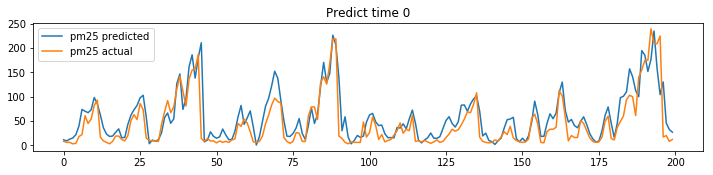

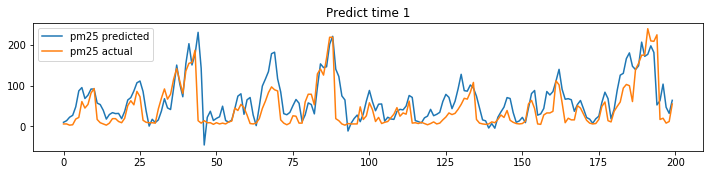

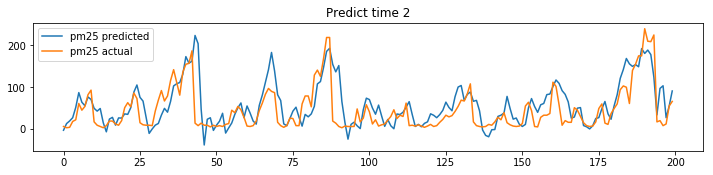

In [21]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

## Linear model

In [13]:
from sklearn import linear_model

In [14]:
# linear regression
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[1] * train_X.shape[2]))

reg = linear_model.LinearRegression()
reg.fit(train_X_reshaped, train_y)
y_predict_lr = reg.predict(test_X.reshape((test_X.shape[0], test_X.shape[1] * test_X.shape[2])))

pm25_predict_lr = inv_normalization(y_predict_lr, predict_hours)


In [24]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lr[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lr[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
26.580198387876433
rmse:
39.16174113371231
predict_hours 1
mae:
34.5751452156199
rmse:
49.11368610067947
predict_hours 2
mae:
39.83204964308889
rmse:
54.77784801775598


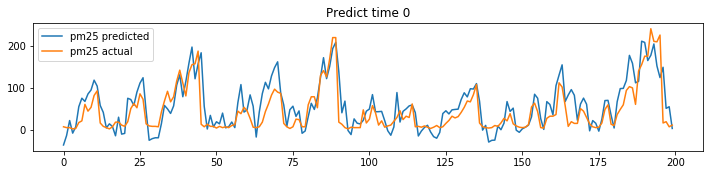

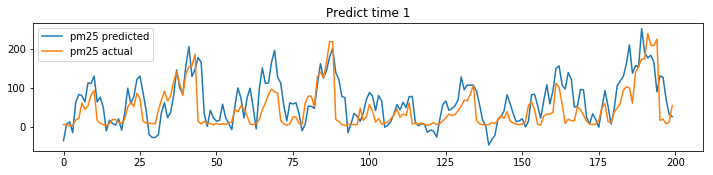

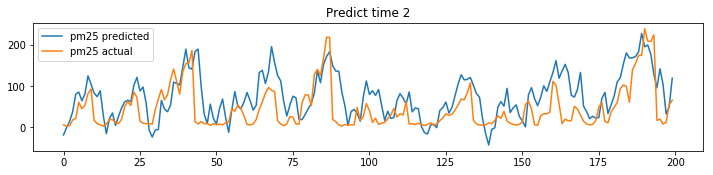

In [20]:
# Plot for linear regression
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lr[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [24]:
t = np.tile(ypredict,(1,5))

In [167]:
train_y.shape

(2131, 1)

In [108]:
ypredict.shape

(532, 3)

In [121]:
pm25_actual.shape

(532, 3)

In [116]:
pm25_predict[:,1]

array([ 0.02512626,  0.13157386,  0.42580077,  0.01957737,  0.06231519,
        0.02118389,  0.16410474,  0.05062803,  0.07270921,  0.01696643,
        0.13278526,  0.10435077,  0.05019544,  0.17845559,  0.05315086,
        0.07699878,  0.03578535,  0.20254955,  0.00799736,  0.03828513,
        0.03645626, -0.02934895,  0.07096433,  0.05544633,  0.00306354,
       -0.00184802,  0.0489907 ,  0.045976  ,  0.08306812,  0.26169065,
        0.06274786,  0.05632127,  0.28027174,  0.06150862,  0.03163888,
        0.01078969,  0.02413501,  0.1811978 ,  0.03442261,  0.07689123,
        0.03582137,  0.11131186, -0.00857573,  0.07133815,  0.09203243,
        0.09898623,  0.04388558,  0.06305756,  0.04395104,  0.1310133 ,
        0.08464725,  0.02060915,  0.2815719 ,  0.10502711,  0.14615808,
        0.05662401,  0.06258877,  0.05891931,  0.07595711,  0.13015519,
        0.34132555,  0.04103775,  0.38648757,  0.19144152,  0.01765127,
        0.01077341,  0.23759626,  0.16167738,  0.01709972,  0.15

# LSTM implemented by PyTorch

In [17]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

import utility as util

global logger

util.setup_log()
# util.setup_path()
logger = util.logger

In [120]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, logger=logger):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.logger = logger
        
    def forward(self, input_data):
        #Set initial states
        h0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        
        #Forward propagation of RNN
        out, self.hidden = self.lstm(input_data, (h0, c0))
        
        #Decode hidden state of last time step, and followed by a fully connected layer
        out = self.fc(out[:, -1, :])

        return out


In [91]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

(4382, 8, 21)
(1096, 8, 21)
(4382, 3)


In [185]:
class LSTM_model:
    def __init__(self, input_size, hidden_size, num_layers, output_size, logger,
                 learning_rate = 0.01, batch_size = 128):
        self.rnn = LSTM(input_size=input_size, hidden_size=64, num_layers=1, output_size=output_size)

        # Loss and Optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
        
    def train(self, train_X, train_y, num_epochs = 10):
        # Train the Model
        for epoch in range(num_epochs):
            for i, (X, y) in enumerate(zip(train_X, train_y)):
                X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
                y_true = torch.from_numpy(y).type(torch.FloatTensor)

                # Forward + Backward + Optimize
                self.optimizer.zero_grad()
        #         logger.info("Shape of X: %s", X_.shape)
                y_pred = self.rnn(X_).squeeze()
        #         logger.info("Shape of y_pred: %s", y_pred)
                loss = self.criterion(y_pred, y_true)

        #         logger.info("Loss: %s", loss)
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print ('Epoch [%d/%d],  Loss: %.4f' 
                           %(epoch+1, num_epochs,  loss.data[0]))
                    print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))
                    
    def train_iteration(self):
        pass
    
    def predict(self, X):
        # Process the input data X
        X_ = torch.from_numpy(test_X).type(torch.FloatTensor)
        
        return self.rnn(X_).squeeze().detach().numpy()

    

# print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 


In [186]:
model = LSTM_model(input_size=n_features, hidden_size=64, num_layers=1, output_size=predict_hours, logger=logger)
model.train(train_X, train_y)

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/10],  Loss: 0.0170
y_pred: 0.0362, y_true: 0.0938
Epoch [1/10],  Loss: 0.1000
y_pred: 0.0421, y_true: 0.3094
Epoch [1/10],  Loss: 0.0057
y_pred: 0.0090, y_true: 0.0132
Epoch [1/10],  Loss: 0.0235
y_pred: 0.0451, y_true: 0.1686
Epoch [1/10],  Loss: 0.0206
y_pred: 0.0417, y_true: 0.0572
Epoch [1/10],  Loss: 0.0212
y_pred: 0.0548, y_true: 0.1485
Epoch [1/10],  Loss: 0.0077
y_pred: 0.0385, y_true: 0.0257
Epoch [1/10],  Loss: 0.0058
y_pred: 0.0531, y_true: 0.0092
Epoch [1/10],  Loss: 0.0280
y_pred: 0.0604, y_true: 0.2177
Epoch [1/10],  Loss: 0.0214
y_pred: 0.0432, y_true: 0.0808
Epoch [1/10],  Loss: 0.1188
y_pred: 0.0540, y_true: 0.2787
Epoch [1/10],  Loss: 0.0188
y_pred: 0.0166, y_true: 0.0202
Epoch [1/10],  Loss: 0.1711
y_pred: 0.0431, y_true: 0.4154
Epoch [1/10],  Loss: 0.0029
y_pred: 0.0426, y_true: 0.0323
Epoch [1/10],  Loss: 0.0058
y_pred: 0.0184, y_true: 0.0069
Epoch [1/10],  Loss: 0.0044
y_pred: 0.0420, y_true: 0.0161
Epoch [1/10],  Loss: 0.0449
y_pred: 0.0219, y_true: 0.15

Epoch [4/10],  Loss: 0.1188
y_pred: 0.0540, y_true: 0.2787
Epoch [4/10],  Loss: 0.0188
y_pred: 0.0166, y_true: 0.0202
Epoch [4/10],  Loss: 0.1711
y_pred: 0.0431, y_true: 0.4154
Epoch [4/10],  Loss: 0.0029
y_pred: 0.0426, y_true: 0.0323
Epoch [4/10],  Loss: 0.0058
y_pred: 0.0184, y_true: 0.0069
Epoch [4/10],  Loss: 0.0044
y_pred: 0.0420, y_true: 0.0161
Epoch [4/10],  Loss: 0.0449
y_pred: 0.0219, y_true: 0.1548
Epoch [4/10],  Loss: 0.0232
y_pred: 0.0261, y_true: 0.0642
Epoch [4/10],  Loss: 0.0053
y_pred: 0.0312, y_true: 0.0378
Epoch [4/10],  Loss: 0.0118
y_pred: 0.0505, y_true: 0.1320
Epoch [4/10],  Loss: 0.0172
y_pred: 0.0477, y_true: 0.1201
Epoch [4/10],  Loss: 0.0054
y_pred: 0.0649, y_true: 0.1496
Epoch [4/10],  Loss: 0.0029
y_pred: 0.0340, y_true: 0.0279
Epoch [4/10],  Loss: 0.0052
y_pred: 0.0353, y_true: 0.0147
Epoch [4/10],  Loss: 0.0563
y_pred: 0.0312, y_true: 0.1496
Epoch [4/10],  Loss: 0.0367
y_pred: 0.0396, y_true: 0.1276
Epoch [4/10],  Loss: 0.0051
y_pred: 0.0064, y_true: 0.00

Epoch [7/10],  Loss: 0.0172
y_pred: 0.0477, y_true: 0.1201
Epoch [7/10],  Loss: 0.0054
y_pred: 0.0649, y_true: 0.1496
Epoch [7/10],  Loss: 0.0029
y_pred: 0.0340, y_true: 0.0279
Epoch [7/10],  Loss: 0.0052
y_pred: 0.0353, y_true: 0.0147
Epoch [7/10],  Loss: 0.0563
y_pred: 0.0312, y_true: 0.1496
Epoch [7/10],  Loss: 0.0367
y_pred: 0.0396, y_true: 0.1276
Epoch [7/10],  Loss: 0.0051
y_pred: 0.0064, y_true: 0.0044
Epoch [7/10],  Loss: 0.1562
y_pred: 0.0369, y_true: 0.3768
Epoch [7/10],  Loss: 0.0045
y_pred: 0.0178, y_true: 0.0205
Epoch [7/10],  Loss: 0.0103
y_pred: 0.0084, y_true: 0.0132
Epoch [7/10],  Loss: 0.0327
y_pred: 0.0256, y_true: 0.1217
Epoch [7/10],  Loss: 0.0086
y_pred: 0.0293, y_true: 0.0425
Epoch [7/10],  Loss: 0.0106
y_pred: 0.0391, y_true: 0.0718
Epoch [7/10],  Loss: 0.0301
y_pred: 0.0566, y_true: 0.0792
Epoch [7/10],  Loss: 0.0123
y_pred: 0.0428, y_true: 0.0601
Epoch [7/10],  Loss: 0.0206
y_pred: 0.0673, y_true: 0.1906
Epoch [7/10],  Loss: 0.0110
y_pred: 0.0589, y_true: 0.05

Epoch [10/10],  Loss: 0.0327
y_pred: 0.0256, y_true: 0.1217
Epoch [10/10],  Loss: 0.0086
y_pred: 0.0293, y_true: 0.0425
Epoch [10/10],  Loss: 0.0106
y_pred: 0.0391, y_true: 0.0718
Epoch [10/10],  Loss: 0.0301
y_pred: 0.0566, y_true: 0.0792
Epoch [10/10],  Loss: 0.0123
y_pred: 0.0428, y_true: 0.0601
Epoch [10/10],  Loss: 0.0206
y_pred: 0.0673, y_true: 0.1906
Epoch [10/10],  Loss: 0.0110
y_pred: 0.0589, y_true: 0.0513
Epoch [10/10],  Loss: 0.0051
y_pred: 0.0452, y_true: 0.0469
Epoch [10/10],  Loss: 0.1493
y_pred: 0.0494, y_true: 0.2683
Epoch [10/10],  Loss: 0.0467
y_pred: 0.0250, y_true: 0.1129
Epoch [10/10],  Loss: 0.3198
y_pred: 0.0485, y_true: 0.7742
Epoch [10/10],  Loss: 0.1437
y_pred: 0.0322, y_true: 0.3871
Epoch [10/10],  Loss: 0.0051
y_pred: 0.0239, y_true: 0.0044


In [198]:
# Test the Model
y_pred = np.zeros(test_y.shape)
for i, (X, y) in enumerate(zip(test_X, test_y)):
#     print(X)
#     X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
#     logger.info("Shape of X: %s", X_.shape)
    y_pred[i] = model.predict(X)


ValueError: could not broadcast input array from shape (1096,3) into shape (3)

In [112]:
for parameter in rnn.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.7054,  0.8175,  0.8321,  ...,  0.8498,  0.7090,  0.7807],
        [-0.7309, -0.6214, -0.6244,  ..., -0.6923, -0.5723, -0.6928],
        [-0.6854, -0.4782, -0.5938,  ..., -0.6823, -0.6610, -0.5080],
        ...,
        [ 0.3398, -0.1964, -0.1445,  ..., -0.9060, -0.8848, -0.7107],
        [-0.7336, -0.5653, -0.6729,  ..., -0.4836, -0.7018, -0.5942],
        [-4.2888, -0.7359, -1.3293,  ..., -0.7248, -1.4941, -2.1348]])
Parameter containing:
tensor([[ 0.8232,  0.0696,  0.0709,  ..., -0.8558,  0.2379, -0.6844],
        [-0.4558,  0.3333, -0.4799,  ...,  0.4859, -0.4771,  0.6777],
        [-0.6180,  0.3465, -0.4466,  ...,  0.6634, -0.5911,  0.6317],
        ...,
        [ 0.2671, -0.3734,  0.3589,  ...,  1.2032,  0.2722, -0.3981],
        [-0.6525,  0.3937, -0.4584,  ...,  0.6516, -0.3301,  0.5256],
        [-0.1539, -0.3216,  0.3422,  ...,  0.6458,  0.3777,  0.7052]])
Parameter containing:
tensor([ 0.8721, -0.5808, -0.6445, -0.7046,  0.8283,  0.8453,  0.6

In [195]:
pm25_predict_lstm = inv_normalization(y_pred, predict_hours=3)

In [196]:
pm25_actual = inv_normalization(test_y, predict_hours=3)

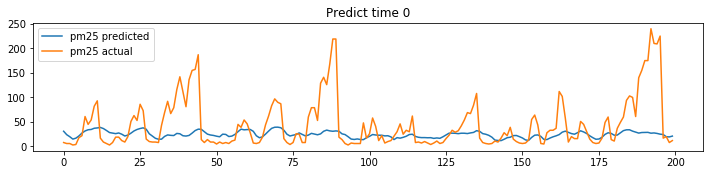

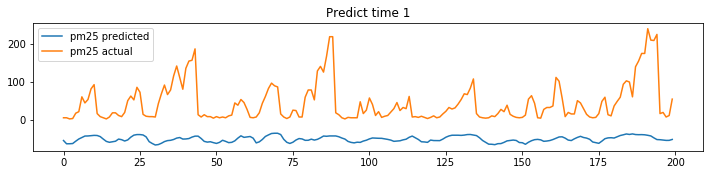

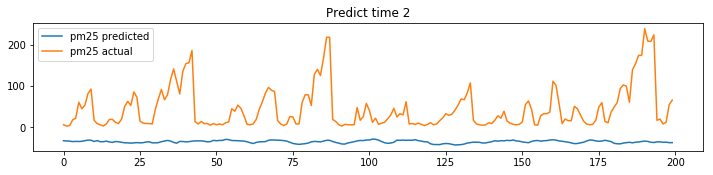

In [197]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lstm[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [157]:
y_pred

array([[ 0.11921173,  0.04589417, -0.0456301 ],
       [ 0.11787776,  0.04238185, -0.03115819],
       [ 0.11405857,  0.04611222, -0.03656079],
       ...,
       [ 0.13925512,  0.0476341 , -0.04591899],
       [ 0.12476713,  0.04738829, -0.03824335],
       [ 0.1195848 ,  0.05117106, -0.03825921]], dtype=float32)

In [85]:
pm25_predict_lstm

array([[84.98489 , 81.81551 , 74.51142 ],
       [83.79421 , 80.81477 , 73.55305 ],
       [85.29933 , 82.07638 , 74.76462 ],
       ...,
       [85.32416 , 82.09897 , 74.787796],
       [85.30145 , 82.07902 , 74.76753 ],
       [85.331955, 82.103836, 74.79153 ]], dtype=float32)